# Compiles all Sources of COP vs. Outdoor Temperature and Plots them

In [1]:
import pandas as pd
import numpy as np

import altair as alt

In [2]:
# File names of the pickled DataFrames containing the data
files = (
    'temp_cop_manuf_max.pkl',
    'temp_cop_manuf_varying.pkl',
    '../field_studies/kaluza/temp_cop_kaluza.pkl',
    '../field_studies/kaluza/temp_cop_kaluza_remote.pkl',
)
df = None
for fn_pkl in files:
    if df is None:
        df = pd.read_pickle(fn_pkl)
    else:
        df = pd.concat([df, pd.read_pickle(fn_pkl)])
df

,temperature,cop,source,field_study
0.0,5.000000,2.103426,"Manuf Spec, Max Load",False
1.0,17.000000,2.384794,"Manuf Spec, Max Load",False
2.0,47.000000,3.166171,"Manuf Spec, Max Load",False
0.0,5.000000,2.103426,"Manuf Spec, Varying Load",False
1.0,17.000000,2.678211,"Manuf Spec, Varying Load",False
2.0,47.000000,4.108061,"Manuf Spec, Varying Load",False
1.0,9.323181,2.203241,"Seward, Kaluza",True
2.0,12.532493,2.210258,"Seward, Kaluza",True
3.0,17.358148,2.345697,"Seward, Kaluza",True
4.0,23.870238,2.617557,"Seward, Kaluza",True


In [3]:
# define the theme by returning the dictionary of configurationsa
def larger():
    return {
        'config': {
            'view': {
                'height': 350,
                'width': 525,
            },
            'axis': {
                'labelFontSize': 14, 
                'titleFontSize': 16
            },
            'legend': {
                'labelFontSize': 12, 
                'titleFontSize': 14
            },
        }
    }

# register the custom theme under a chosen name
alt.themes.register('larger', larger)

# enable the newly registered theme
alt.themes.enable('larger')

ThemeRegistry.enable('larger')

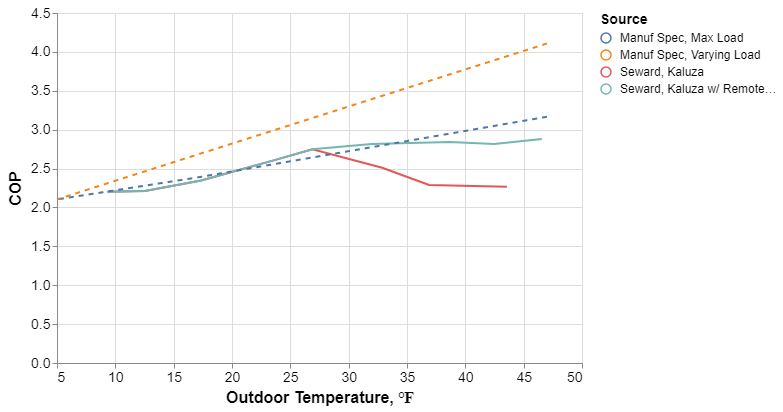

In [4]:
line1 = alt.Chart(df.query('field_study == True')).mark_line().encode(
    x = 'temperature',
    y = 'cop',
    color = 'source:N',
    #opacity = 'Selected:N',
)
line2 = alt.Chart(df.query('field_study == False')).mark_line(strokeDash=[5,5]).encode(
    x = alt.X('temperature', axis=alt.Axis(title='Outdoor Temperature, ℉')),
    y = alt.Y('cop', axis=alt.Axis(title='COP')),
    color = alt.Color('source:N', legend=alt.Legend(title="Source")),
    #opacity = 'Selected:N',
)
line1 + line2